In [1]:
import sys
sys.path.append(r'C:\Users\patry\NLP_app')

from image_text_generator import ImageTextGenerator

generator = ImageTextGenerator(model_name="flax-community/papuGaPT2", fonts_folder=r"C:\Users\patry\Desktop\wypakwoane", random_state=42)
df = generator.generate_data()

C:\Users\patry\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
C:\Users\patry\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\gpt2\modeling_gpt2.py:650: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cu

In [2]:
import numpy as np

def image_shape(image):
    return np.array(image).shape

df['image_shape'] = df['image'].apply(image_shape)

df.head()


,image,text,image_shape
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,put down a resolution on the subject,"(128, 2467)"
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,and he is to be backed by Mr. Will,"(128, 2667)"
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,nominating any more Labour life Peers,"(128, 2235)"
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,M Ps tomorrow. Mr. Michael Foot has,"(128, 3396)"
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"Griffiths, M P for Manchester Exchange .","(128, 2984)"


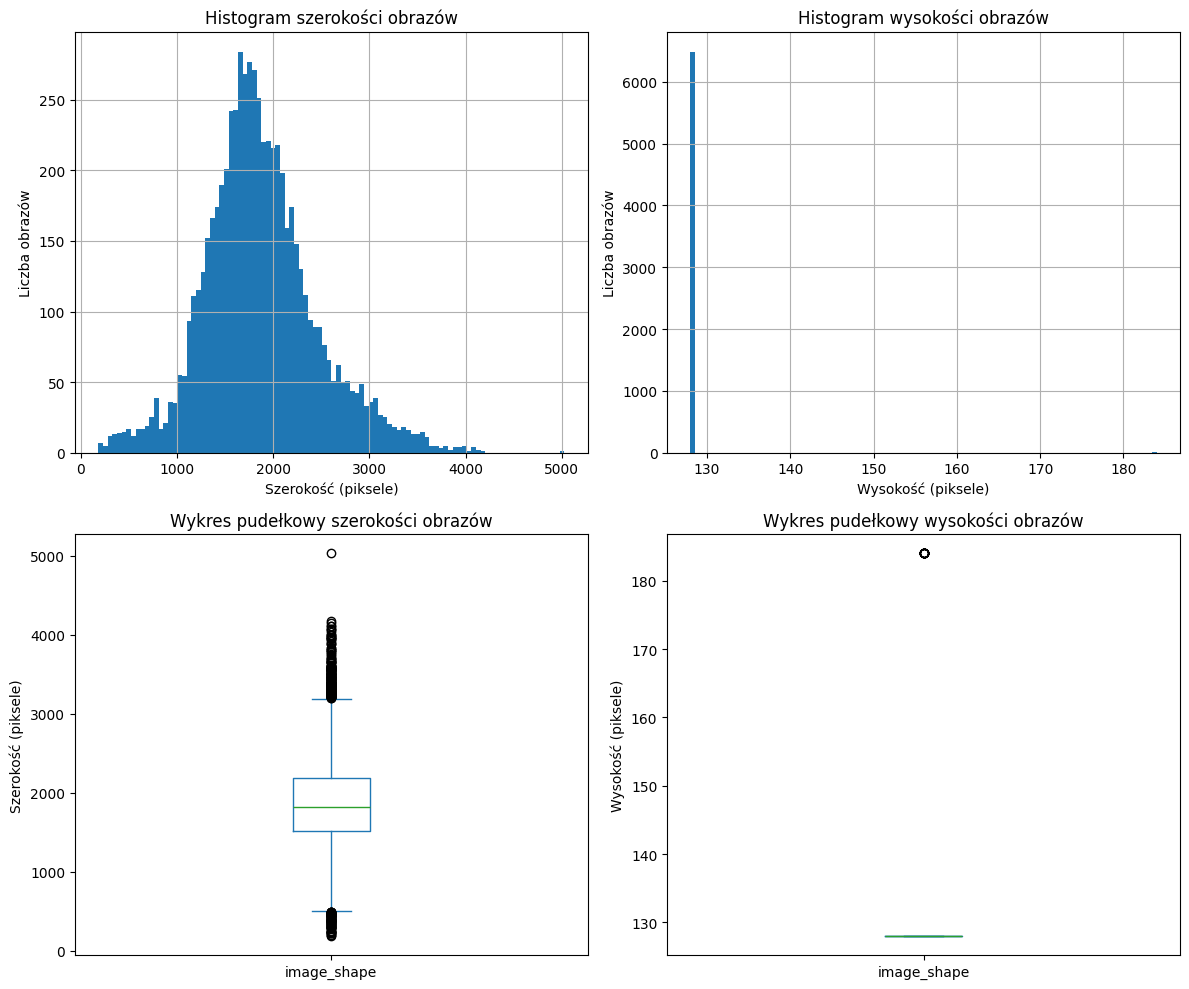

In [3]:
import matplotlib.pyplot as plt

# Wyciąganie szerokości i wysokości z kształtów obrazów
wight = df['image_shape'].apply(lambda x: x[1])
height = df['image_shape'].apply(lambda x: x[0])

# Tworzenie subplotów
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Histogram szerokości obrazów
wight.hist(ax=ax[0, 0], bins=100)
ax[0, 0].set_title('Histogram szerokości obrazów')
ax[0, 0].set_xlabel('Szerokość (piksele)')
ax[0, 0].set_ylabel('Liczba obrazów')

# Histogram wysokości obrazów
height.hist(ax=ax[0, 1], bins=100)
ax[0, 1].set_title('Histogram wysokości obrazów')
ax[0, 1].set_xlabel('Wysokość (piksele)')
ax[0, 1].set_ylabel('Liczba obrazów')

# Wykres pudełkowy szerokości obrazów
wight.plot(kind='box', ax=ax[1, 0])
ax[1, 0].set_title('Wykres pudełkowy szerokości obrazów')
ax[1, 0].set_ylabel('Szerokość (piksele)')

# Wykres pudełkowy wysokości obrazów
height.plot(kind='box', ax=ax[1, 1])
ax[1, 1].set_title('Wykres pudełkowy wysokości obrazów')
ax[1, 1].set_ylabel('Wysokość (piksele)')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()

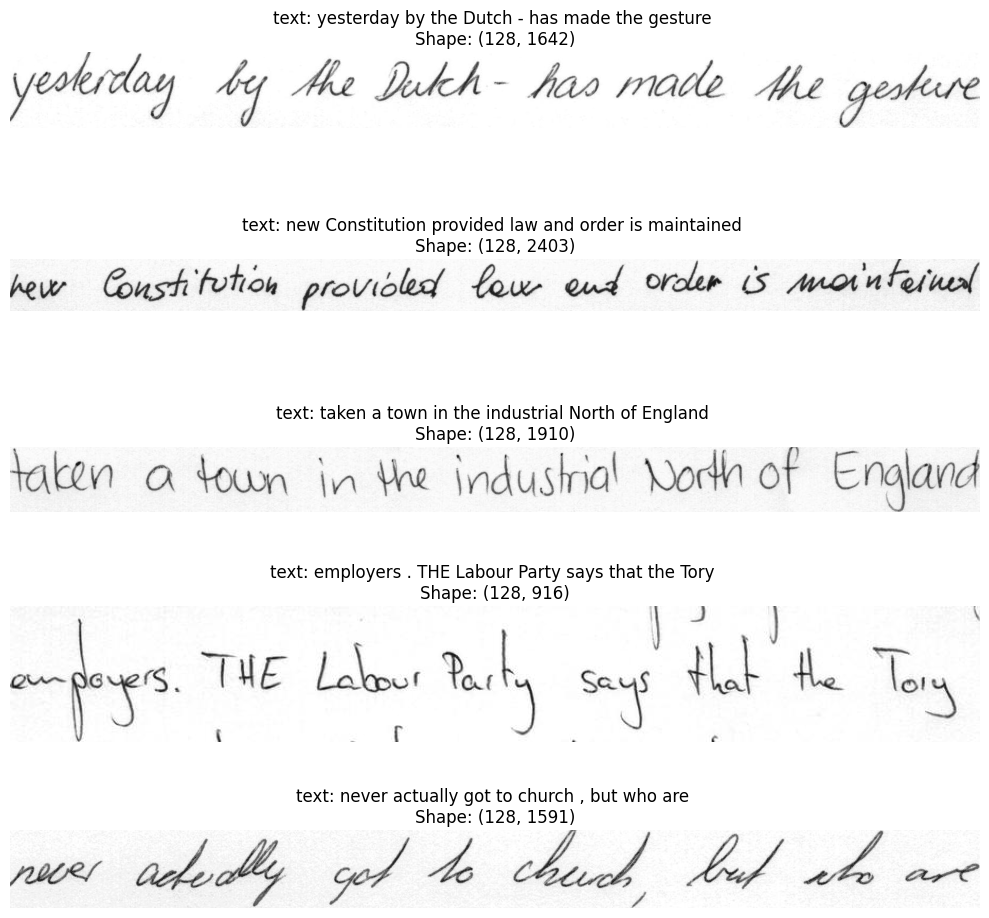

In [4]:
import random
import matplotlib.pyplot as plt

def plot_data(df, num_images=5):
    fig, ax = plt.subplots(num_images, 1, figsize=(10, 10))
    ax = ax.flatten()

    for i in range(num_images):
        random_index = random.randint(0, len(df) - 1)
        image = df.iloc[random_index]['image']
        ax[i].imshow(image, cmap='gray')
        ax[i].axis('off')
        ax[i].set_title(f"text: {df.iloc[random_index]['text']} \nShape: {df.iloc[random_index]['image_shape']}")

    plt.tight_layout()
    plt.show()

plot_data(df)

In [5]:
def filter_data(image_shape, upper_width, lower_width, upper_height, lower_height):
    # Zakładam, że image_shape to krotka (width, height)
    image_width = image_shape[1]

    image_height = image_shape[0]
    
    # Sprawdzamy, czy szerokość jest w odpowiednim zakresie
    if lower_width < image_width < upper_width and lower_height < image_height < upper_height:
        return True
    else:
        return False

# Filtrowanie danych
df = df[df['image_shape'].apply(lambda x: filter_data(x, 2500, 1800, 7500, 0))].reset_index()

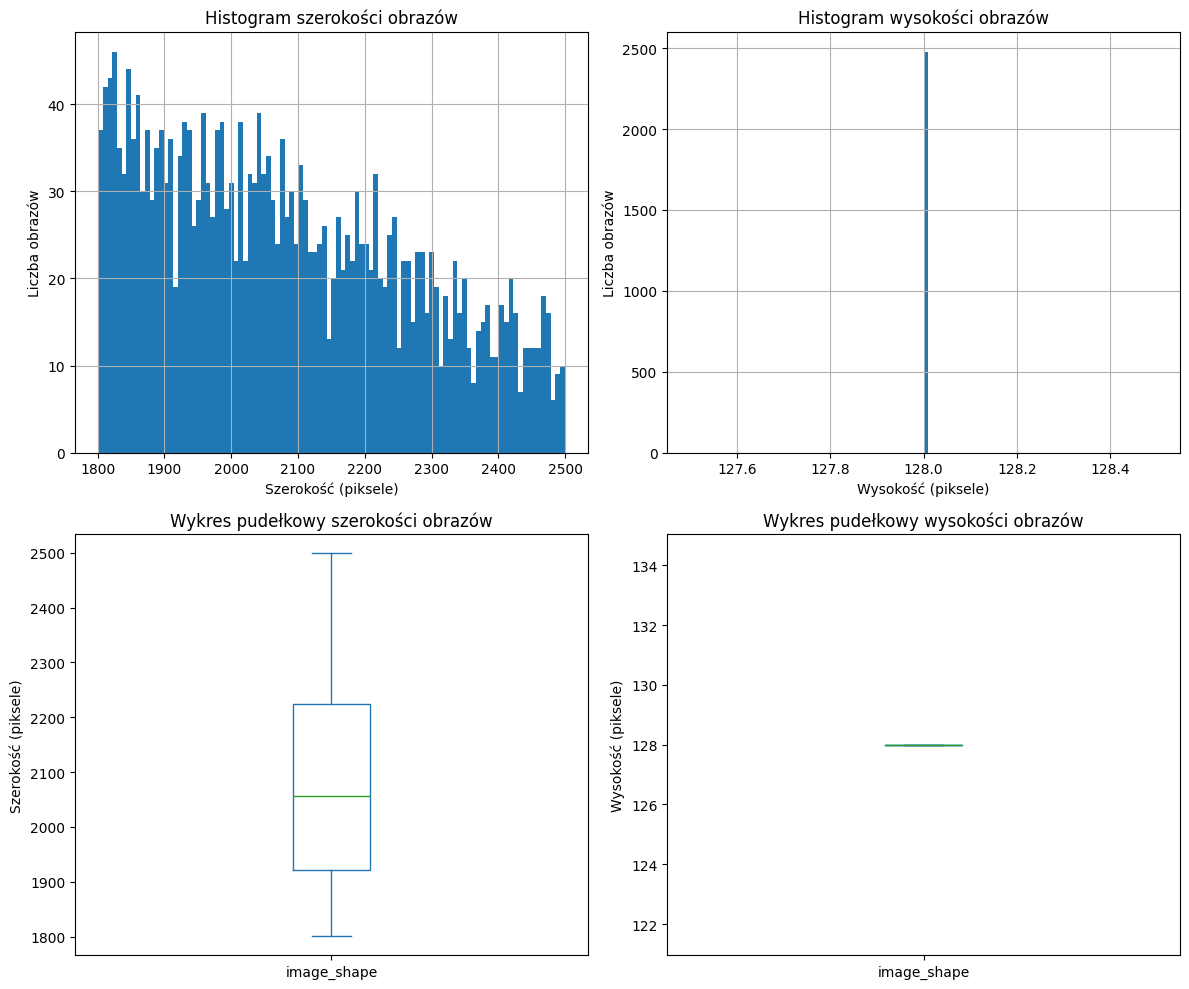

In [6]:
import matplotlib.pyplot as plt

# Wyciąganie szerokości i wysokości z kształtów obrazów
wight = df['image_shape'].apply(lambda x: x[1])
height = df['image_shape'].apply(lambda x: x[0])

# Tworzenie subplotów
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Histogram szerokości obrazów
wight.hist(ax=ax[0, 0], bins=100)
ax[0, 0].set_title('Histogram szerokości obrazów')
ax[0, 0].set_xlabel('Szerokość (piksele)')
ax[0, 0].set_ylabel('Liczba obrazów')

# Histogram wysokości obrazów
height.hist(ax=ax[0, 1], bins=100)
ax[0, 1].set_title('Histogram wysokości obrazów')
ax[0, 1].set_xlabel('Wysokość (piksele)')
ax[0, 1].set_ylabel('Liczba obrazów')

# Wykres pudełkowy szerokości obrazów
wight.plot(kind='box', ax=ax[1, 0])
ax[1, 0].set_title('Wykres pudełkowy szerokości obrazów')
ax[1, 0].set_ylabel('Szerokość (piksele)')

# Wykres pudełkowy wysokości obrazów
height.plot(kind='box', ax=ax[1, 1])
ax[1, 1].set_title('Wykres pudełkowy wysokości obrazów')
ax[1, 1].set_ylabel('Wysokość (piksele)')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()

In [7]:
import numpy as np
from PIL import Image
import cv2

def resize_and_pad_image(image, target_width=2500, target_height=128):
    if isinstance(image, Image.Image):
        image = np.array(image.convert('L'))  # Konwersja do odcieni szarości
    height, width = image.shape
    if height == 0 or width == 0:
        raise ValueError("The image has invalid dimensions.")
    
    scale_width = target_width / width
    scale_height = target_height / height
    scale = min(scale_width, scale_height)
    
    new_width = int(width * scale)
    new_height = int(height * scale)

    img_resized = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LANCZOS4)
    new_img = np.full((target_height, target_width), 255, dtype=np.uint8)

    paste_x = (target_width - new_width) // 2
    paste_y = (target_height - new_height) // 2

    new_img[paste_y:paste_y + new_height, paste_x:paste_x + new_width] = img_resized

    return new_img

def add_padding(row):
    image_data = row['image']
    if isinstance(image_data, np.ndarray) or isinstance(image_data, Image.Image):
        return resize_and_pad_image(image_data)
    return row  # Zwracamy niezmieniony wiersz, jeśli kolumna nie istnieje lub obraz nie jest w odpowiednim formacie

# Zastosowanie funkcji do DataFrame
#df['padded_image'] = df.apply(add_padding, axis=1)
#df['image_shape'] = df['padded_image'].map(image_shape)


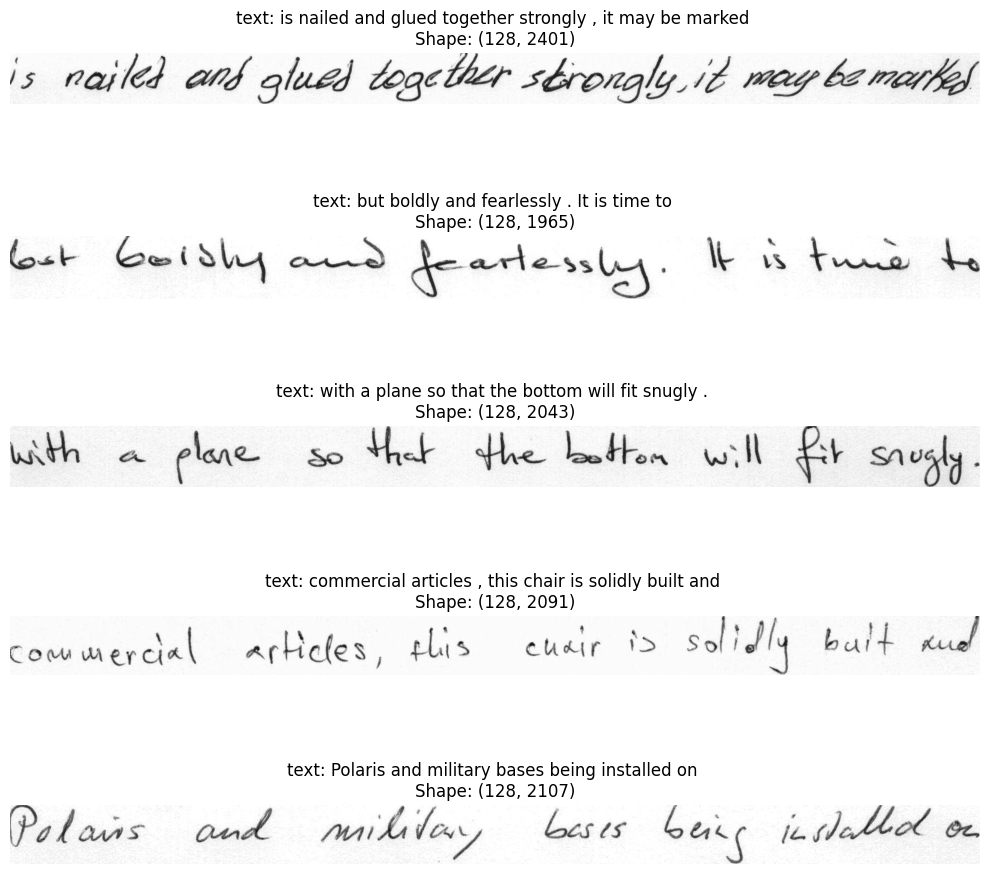

In [8]:
plot_data(df)

In [9]:
from sklearn.model_selection import train_test_split

#if 'image' in df.columns:
#    df = df.drop(['image'], axis=1)

train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42) 

In [10]:
import torch 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [11]:
import numpy as np
from PIL import Image
import torch
from torch.utils.data import Dataset

class IAMDataset(Dataset):
    def __init__(self, df, processor, max_target_length=10, device=None):
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length
        self.device = device

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Pobierz obraz i tekst
        image_array = np.array(self.df['image'].iloc[idx])
        text = self.df['text'].iloc[idx]

        # Konwersja numpy array do obrazu PIL i dodanie kanałów RGB
        if len(image_array.shape) == 2:  # 2D (wysokość, szerokość)
            image = Image.fromarray(image_array).convert('RGB')
        elif len(image_array.shape) == 3 and image_array.shape[2] == 1:  # 3D z jednym kanałem
            image = Image.fromarray(image_array.squeeze(axis=2)).convert('RGB')
        else:  # Zakładając, że obraz już ma 3 kanały
            image = Image.fromarray(image_array)

        # Przygotowanie obrazu (np. zmiana rozmiaru i normalizacja) z użyciem `processor`
        pixel_values = self.processor(images=image, return_tensors="pt").pixel_values

        # Przenoszenie pixel_values na odpowiednie urządzenie
        pixel_values = pixel_values.to(self.device) if self.device else pixel_values

        # Tokenizacja tekstu z przycinaniem i paddingiem przez `processor.tokenizer`
        encoding = self.processor.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_target_length,
            return_tensors="pt"
        )

        # Pobranie input_ids i attention_mask
        input_ids = encoding['input_ids'].squeeze(0)  # Usunięcie wymiaru batcha
        attention_mask = encoding['attention_mask'].squeeze(0)  # Usunięcie wymiaru batcha

        # Upewnij się, że tokeny PAD są ignorowane przez funkcję straty
        labels = input_ids.clone()
        labels[labels == self.processor.tokenizer.pad_token_id] = -100

        # Przenoszenie na urządzenie, jeśli podano
        input_ids = input_ids.to(self.device) if self.device else input_ids
        attention_mask = attention_mask.to(self.device) if self.device else attention_mask
        labels = labels.to(self.device) if self.device else labels

        # Zwrócenie przetworzonego obrazu i etykiet
        return {
            "pixel_values": pixel_values.squeeze(dim=0),  # Usunięcie nadmiarowego wymiaru
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": labels
        }


In [12]:
from transformers import TrOCRProcessor
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-multilingual-cased")

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-stage1", tokenizer=tokenizer)

train_dataset = IAMDataset(df=train_df,
                           processor=processor)
eval_dataset = IAMDataset(df=test_df,
                           processor=processor)
validation_df = IAMDataset(df=val_df,
                           processor=processor)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.69411767..0.99215686].


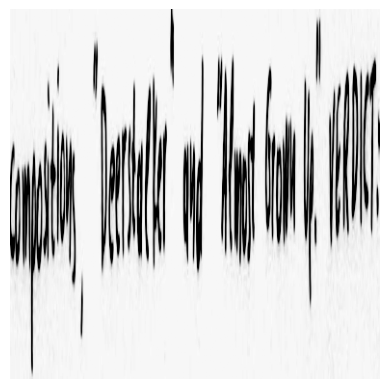

In [13]:
import matplotlib.pyplot as plt

# Pobierz wartości pikseli
pixel_values = validation_df[0]['pixel_values']

# Konwertuj tensor do NumPy (jeśli jest to tensor)
if isinstance(pixel_values, torch.Tensor):
    pixel_values = pixel_values.detach().cpu().numpy()

# Przekształć wartości pikseli z (C, H, W) do (H, W, C) dla wyświetlenia
if pixel_values.ndim == 3:
    pixel_values = pixel_values.transpose(1, 2, 0)

# Wyświetl obraz
plt.imshow(pixel_values)
plt.axis('off')  # Wyłącz osie
plt.show()


In [14]:
from transformers import VisionEncoderDecoderModel

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-stage1").to(device)

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-stage1 and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = model.config.decoder.vocab_size

# set beam search parameters
model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.max_length = 64
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

In [16]:
from datasets import load_metric

cer_metric = load_metric("cer", trust_remote_code=True)

def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer}

C:\Users\patry\AppData\Local\Temp\ipykernel_20844\3597103586.py:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  cer_metric = load_metric("cer", trust_remote_code=True)


In [17]:
import os
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, default_data_collator

# Definiowanie ścieżki do zapisu checkpointów
model_name = "TR_OCR_IAM_dataset_polish"  # Zastąp nazwą modelu
output_dir = os.path.join(r"C:\Users\patry\Desktop\steps", model_name)  # Use raw string to avoid escape issues

# Sprawdzenie, czy istnieje checkpoint
if os.path.exists(output_dir) and any("checkpoint" in f for f in os.listdir(output_dir)):
    last_checkpoint = max([os.path.join(output_dir, d) for d in os.listdir(output_dir) if "checkpoint" in d], key=os.path.getctime)
    print(f"Resuming from checkpoint: {last_checkpoint}")
else:
    last_checkpoint = None
    print("No checkpoint found, starting fresh.")

# Argumenty treningu
training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="steps",
    per_device_train_batch_size=12,
    per_device_eval_batch_size=12,
    fp16=True, 
    output_dir=output_dir,  # Zapis checkpointów w folderze modelu
    logging_steps=2,
    save_steps=50,
    eval_steps=200,
)

# Inicjalizacja trenera
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.feature_extractor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)

# Trening modelu, wznowienie z checkpointa jeśli istnieje
trainer.train(resume_from_checkpoint=last_checkpoint)



No checkpoint found, starting fresh.


C:\Users\patry\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\patry\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\trocr\processing_trocr.py:137: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


### Save model

In [24]:
trainer.save_model(r"C:\Users\patry\Desktop\Models\TROCR_PL")  # Zapisuje model
#processor.save_pretrained(r"C:\Users\patry\Desktop\Models\TROCR_PL")  # Zapisuje tokenizer

NameError: name 'trainer' is not defined

In [21]:
test_df['image'] = test_df['image'].apply(lambda x: x.convert('RGB'))


### Error analiysy

In [30]:
import torch
import torch.nn.functional as F

# Skopiowanie DataFrame
loss_df = test_df.copy()

# Tokenizacja tekstu
loss_df['input_ids'] = loss_df['text'].apply(lambda x: torch.tensor(processor.tokenizer.encode(x).ids).squeeze())

In [31]:
from tqdm import tqdm
import torch.nn.functional as F

def calculate_loss(model, processor, row):
    image = row['image']
    input_id = row['input_ids']

    # Przygotowanie danych wejściowych
    inputs = processor(images=image, return_tensors='pt')
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Generowanie identyfikatorów
    with torch.inference_mode():
        generated_ids = model.generate(inputs['pixel_values'], output_hidden_states=True)

    # Przygotowanie input_ids dla dekodera
    decoder_input_ids = input_id.unsqueeze(0).to(device)  # Upewnij się, że input_id ma odpowiedni kształt

    # Obliczanie logits
    outputs = model(pixel_values=inputs['pixel_values'], decoder_input_ids=decoder_input_ids)
    logits = outputs.logits

    # Obliczanie straty
    loss = F.cross_entropy(logits.view(-1, logits.size(-1)), decoder_input_ids.view(-1), ignore_index=-100)

    return loss.item()

# Obliczanie strat dla wszystkich wierszy w DataFrame z postępem
tqdm.pandas(desc="Calculating loss")
loss_df['loss'] = loss_df.progress_apply(lambda x: calculate_loss(model=model, processor=processor, row=x), axis=1)


Calculating loss:   0%|                                                                        | 0/445 [00:00<?, ?it/s]C:\Users\patry\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\generation\utils.py:1364: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
Calculating loss: 100%|██████████████████████████████████████████████████████████████| 445/445 [38:47<00:00,  5.23s/it]


In [37]:
def predict(model, processor, row):
    image = row['image']
    inputs = processor(images=image, return_tensors='pt')
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.inference_mode():
        generated_ids = model.generate(inputs['pixel_values'])
        # Convert tensor to list before decoding
        generated_text = processor.tokenizer.decode(generated_ids[0].tolist(), skip_special_tokens=True)
    
    return generated_text

tqdm.pandas(desc="Pred")
loss_df['predict_text'] = loss_df.progress_apply(lambda x: predict(model=model, processor=processor, row=x), axis=1)


Pred: 100%|██████████████████████████████████████████████████████████████████████████| 445/445 [31:09<00:00,  4.20s/it]


In [38]:
loss_df.drop('index', axis=1).reset_index()
loss_df = loss_df.sort_values(by='loss', ascending=False)

loss_df

,index,image,text,image_shape,input_ids,loss,predict_text
670,1421,<PIL.Image.Image image mode=RGB size=1832x258 ...,"He wrote "" My September Love, "" the big David ...","(258, 1832, 3)","[tensor(2), tensor(128), tensor(913), tensor(6...",18.851566,""" the the,,, was of"
168,319,<PIL.Image.Image image mode=RGB size=1847x668 ...,"The princess, aged 24, is now studying history...","(668, 1847, 3)","[tensor(2), tensor(99), tensor(1188), tensor(6...",18.801218,"the the a the the, the of"
1004,2214,<PIL.Image.Image image mode=RGB size=1887x341 ...,No wonder he didn't get in!,"(341, 1887, 3)","[tensor(2), tensor(277), tensor(978), tensor(1...",18.762714,""" the the, the,,,"
1924,4743,<PIL.Image.Image image mode=RGB size=1870x387 ...,"You don't need worry, Judge.","(387, 1870, 3)","[tensor(2), tensor(175), tensor(770), tensor(9...",18.741432,""" is the, ' to the the"
406,829,<PIL.Image.Image image mode=RGB size=1818x307 ...,To have such a splendid variety of goods to ch...,"(307, 1818, 3)","[tensor(2), tensor(111), tensor(214), tensor(6...",18.717319,"the wass was the the,,"
...,...,...,...,...,...,...,...
1709,4117,<PIL.Image.Image image mode=RGB size=1872x478 ...,The sun was no longer shining and it was dark ...,"(478, 1872, 3)","[tensor(2), tensor(99), tensor(187), tensor(61...",18.077082,"but the the the in,,s"
707,1482,<PIL.Image.Image image mode=RGB size=1833x480 ...,""" Now, me - I 'm a journalist, I write to ente...","(480, 1833, 3)","[tensor(2), tensor(6), tensor(394), tensor(14)...",18.025339,"the the the ' the the, to the"
2096,5347,<PIL.Image.Image image mode=RGB size=1818x408 ...,' You wanted it so badly - at any price.,"(408, 1818, 3)","[tensor(2), tensor(9), tensor(175), tensor(732...",18.003210,"the the i the, the ',"
807,1690,<PIL.Image.Image image mode=RGB size=1917x431 ...,""" Anybody who is hungry, let him come and eat,...","(431, 1917, 3)","[tensor(2), tensor(6), tensor(369), tensor(82)...",17.903923,""" the the, the,s of"


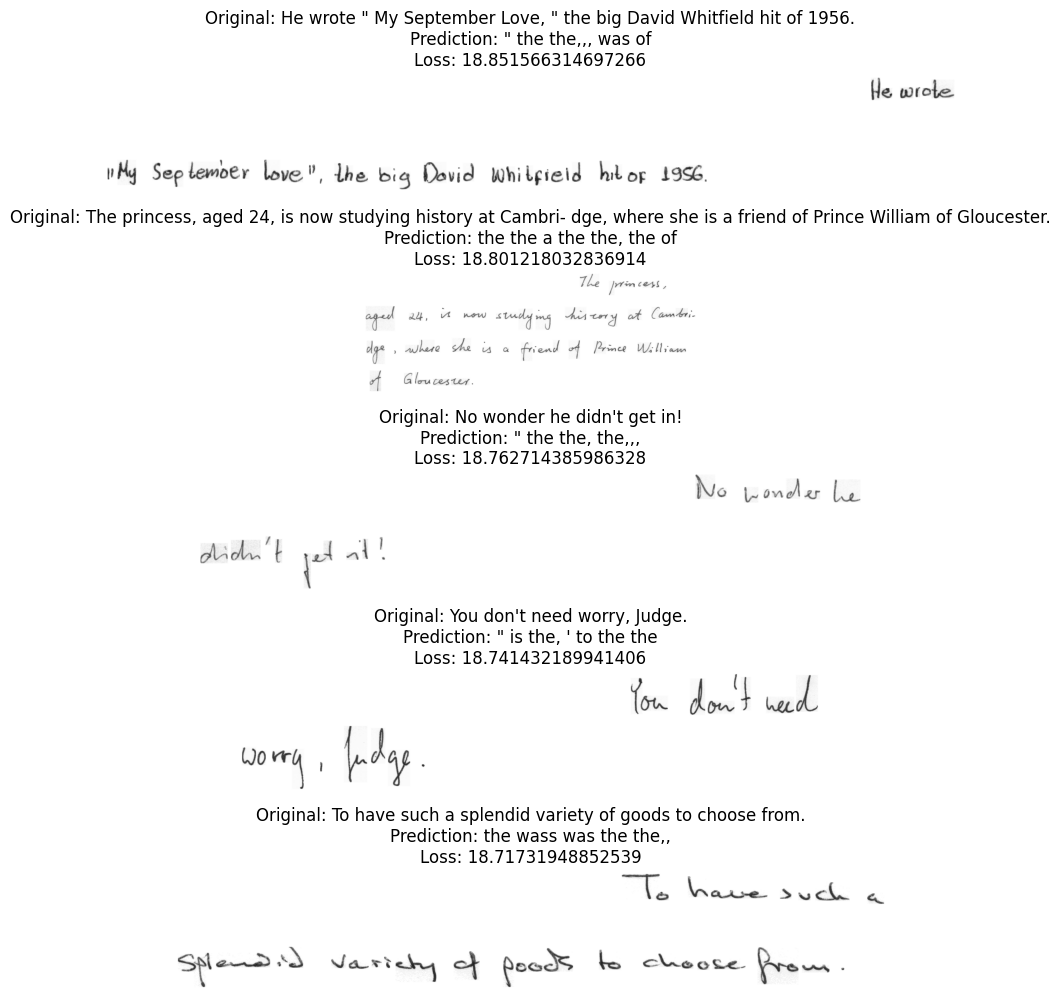

In [39]:
# Ustaw liczbę wierszy, które chcesz wyświetlić
num_rows = 5

# Filtruj pierwsze wiersze i resetuj indeks
df_filtered = loss_df.head(num_rows).reset_index(drop=True)

# Tworzenie figure
fig, axes = plt.subplots(num_rows, 1, figsize=(10, 2 * num_rows))

# Iteracja po wierszach i tworzenie wykresów
for i, row in df_filtered.iterrows():
    image = row['image']
    original_text = row['text']
    predicted_text = row['predict_text']
    loss = row['loss']

    # Wyświetlanie tekstów jako tytuł wykresu
    title = f"Original: {original_text}\nPrediction: {predicted_text}\nLoss: {loss}"
    axes[i].set_title(title)

    # Wyświetlanie obrazu
    axes[i].imshow(image)
    axes[i].axis('off')

# Dostosowanie layoutu
plt.tight_layout()
plt.show()